In [64]:
"""
This is a template that simulate a 3D helmholtz coil
in field amplitude and angle, it shows the 3D model of the 3D Coil

Author: Tarcis Becher
"""
#%% imports
import numpy as np
import magpylib as magpy
from magpylibUtils import constructAccess, coilDesign, plotBxyz

np.set_printoptions(suppress=True)

In [65]:
#%% Configuration of the coils


# BEREKENING Ohms/m AWG 18

# Copper resistivity =	1.68×10−8 Ohms * meter
# => AWG 18 crosssection = 0.823 mm^2
# => Copper ohms/m = 0.020412

# ----------------------------------------------------------#
# 1 2 3 4 5 6 -> LoopsInEachEvenLayer = 6                   #
#|-----------|                                              #
#|0 0 0 0 0 0| even                                         #
#| 0 0 0 0 0 | odd                                          #
#|0 0 0 0 0 0| even (always start with even layer)          #
#|-----------|                                              #
# *cross-cut of the windings where each "0" is a winding    #
#-----------------------------------------------------------#

# have to use a little bit bigger value than wireExternalDiameter, if not, the wire will not fit inside
AllCoilsWireDiameter = (1.0237 + 0.047)*1.09   # AWG 18
#AllCoilsWireDiameter = (0.56 + 0.047)*1.09      # AWG 23

# Assuming a slightly worse ohm/m than theory suggests. 
wireResistence = 0.02240                     # Ohms/m AWG 18

#OLD VALUES AWG 23
#AllCoilsWireDiameter = (0.56 + 0.047)*1.09
#minRes = 0.06736                            # Ohms/m (from dataSheet)
#nominal = 0.06940                           # Ohms/m (from dataSheet)
#maxRes = 0.07153                            # Ohms/m (from dataSheet)
#wireResistence = 0.07153





# z First Coil configuration

zInitialValueCoilDiameter = 170 # Initial value for the function that calculates the precise diameter

#MAX AMPERE = 2A !!

zCoilCurrent = 1.5             # Amperes
zLoopsInEachEvenLayer = 2     # The number of loops in each layer
zEvenLayers = 3                # The evenlayers always have to be equal to oddLayers or oddLayers + 1
zOddLayers = 2
zDesiredField = 0.1           # The desired field in the center of the Helmholtz coil
zColor = 'k'

# y Second Coil configuration

yCoilCurrent = 1.5            # Amperes
yLoopsInEachEvenLayer = 2      # The number of loops in each layer
yEvenLayers = 3                # The evenlayers always have to be oddLayers + 1 or equal oddLayers
yOddLayers = 2
yDesiredField = 0.1           # The desired field in the center of the Helmholtz coil
yColor = 'k'

# x Third Coil configuration

xCoilCurrent = 1.5             # Amperes
xLoopsInEachEvenLayer = 2     # The number of loops in each layer
xEvenLayers = 3                # The evenlayers always have to be oddLayers + 1 or equal oddLayers
xOddLayers = 2
xDesiredField = 0.1           # The desired field in the center of the Helmholtz coil
xColor = 'k'



XDESIGN = True
ZDESIGN = True
YDESIGN = True


XCOILPLOT = True
XCOILSCONNECTORPLOT = False
YCOILPLOT = True
YCOILSCONNECTORPLOT = False
ZCOILPLOT = True
ZCOILSCONNECTORPLOT = False
DISPSYS = True

# xCoil - The collection with the first coil in the 'z' orientation
# yCoil - The collection with the second coil in the 'y' orientation
# xCoil - The collection with the second coil in the 'x' orientation
# connectorsCollection - The collection with all the access together
# zyxCoil - The collection with the coils all together
# zyxCoilandAcess - The collection with the entire system

# some setup for desiredCoilDiameter function
nIteration = 100
relativeDistance = 0.33333


For "z", getB([0,0,0]) =  [0.        0.        0.1024454]  mT:
Internal Distance between coil =  102.87853642068089  mm
Coil internal diameter =  205.75707284136178  mm
Coil width =  2.334126 mm
min Coil height =  5.053531029084439 mm
Coil resistence ~= 0.23394752204358563 ohms
Coil power dissipation ~= 0.5263819245980677 W
Wire length necessary to construct the coil ~= 10.444085805517215 m

For "y", getB([0,0,0]) =  [-0.         0.1000068 -0.       ]  mT:
Internal Distance between coil =  105.44693433375973  mm
Coil internal diameter =  210.89386866751946  mm
Coil width =  2.334126 mm
min Coil height =  5.053531029084439 mm
Coil resistence ~= 0.23973128090249807 ohms
Coil power dissipation ~= 0.5393953820306207 W
Wire length necessary to construct the coil ~= 10.702289326004378 m

For "x", getB([0,0,0]) =  [ 0.09964395 -0.         -0.        ]  mT:
Internal Distance between coil =  105.83984306422361  mm
Coil internal diameter =  211.67968612844723  mm
Coil width =  2.334126 mm
min C

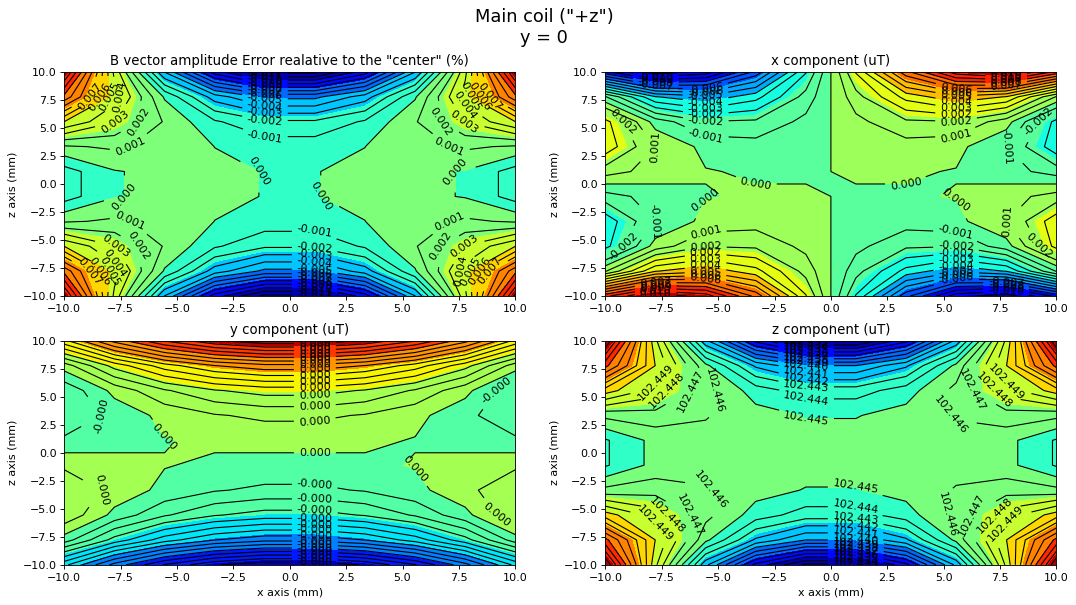

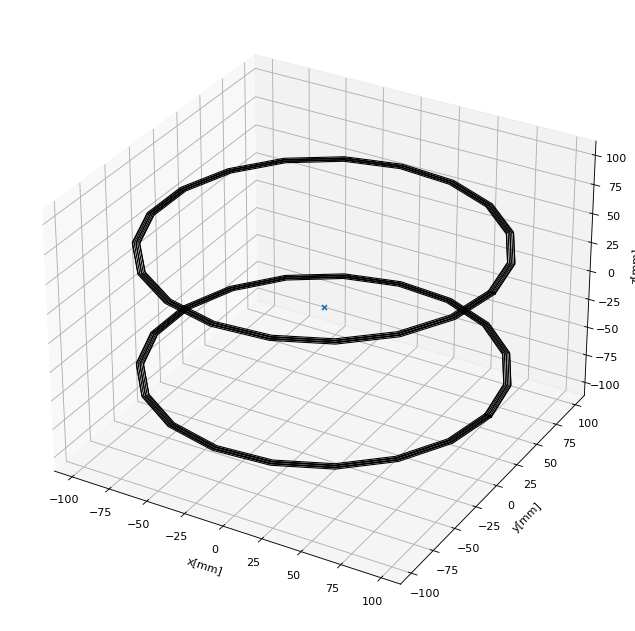

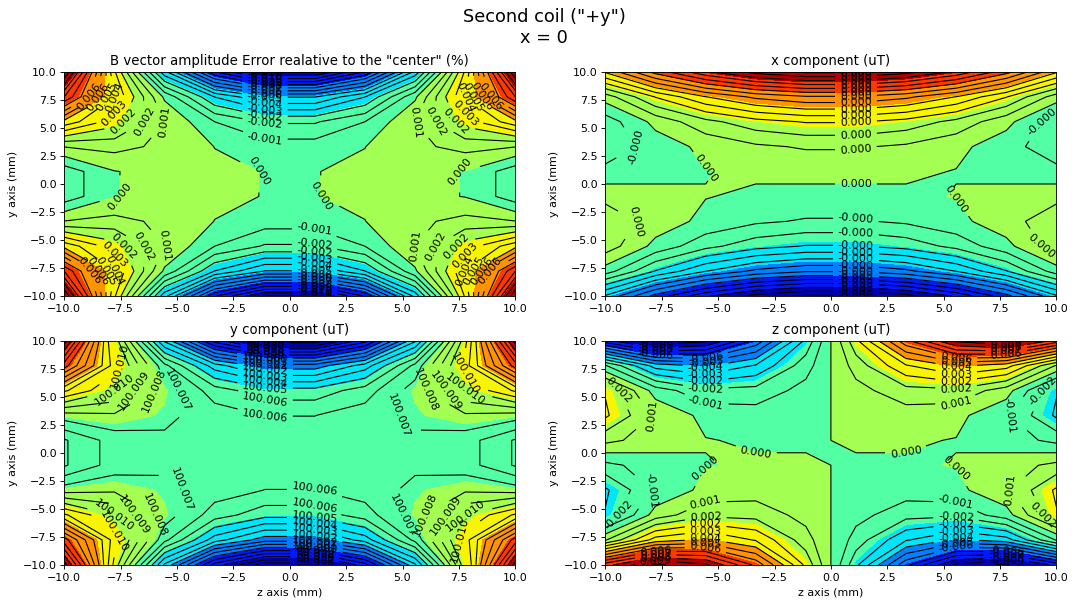

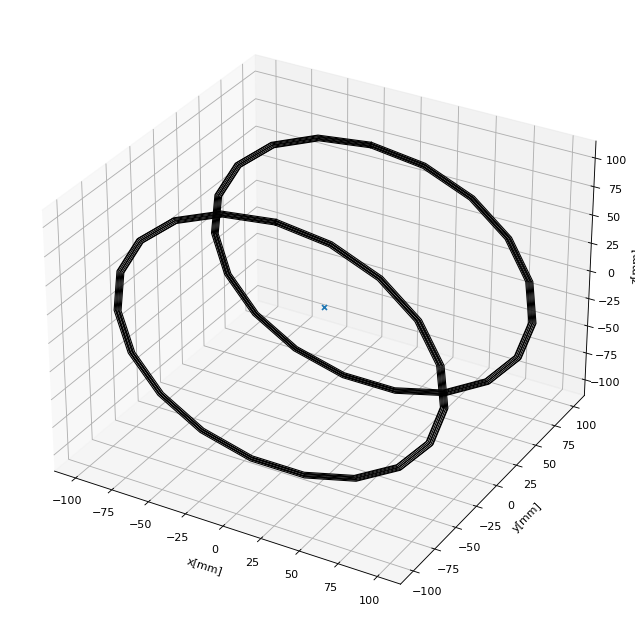

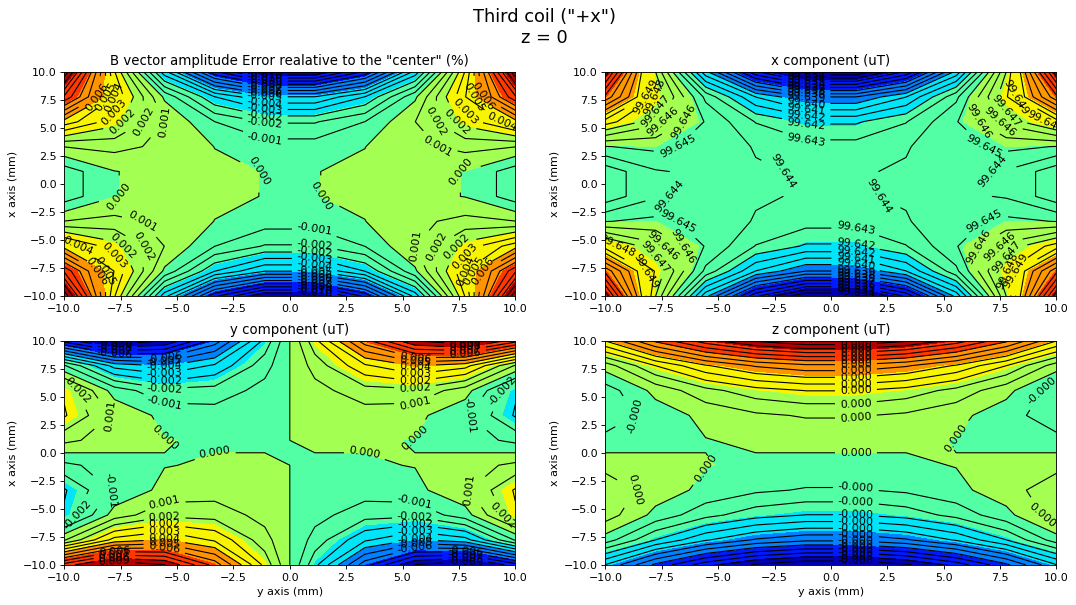

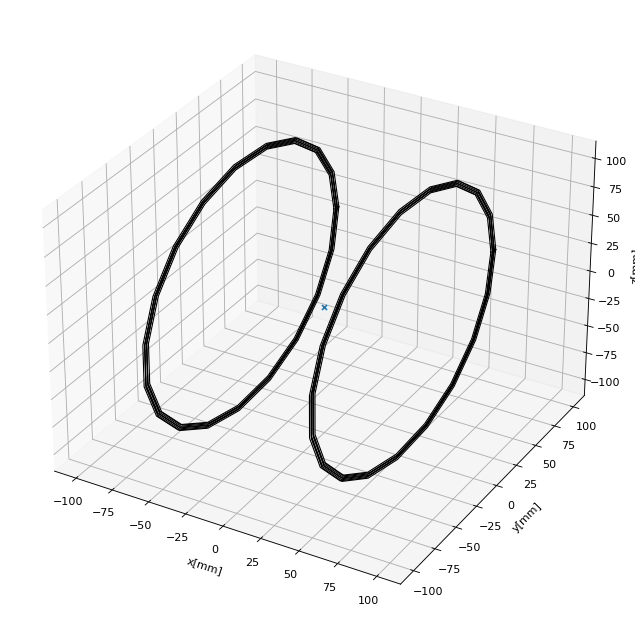

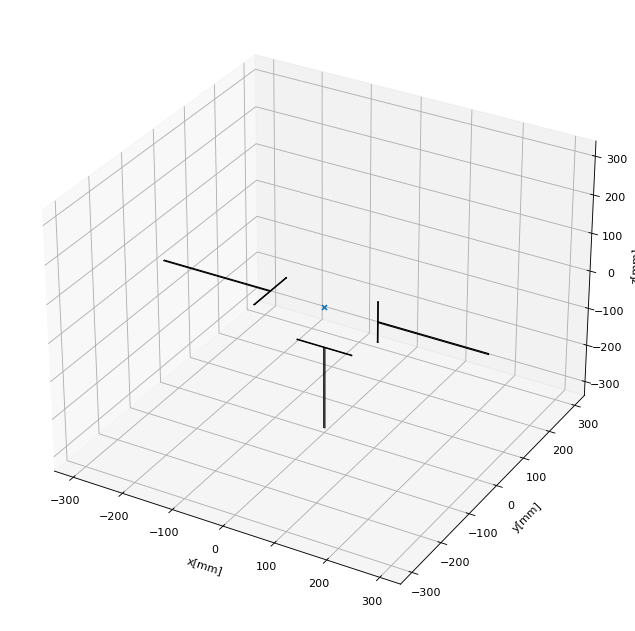

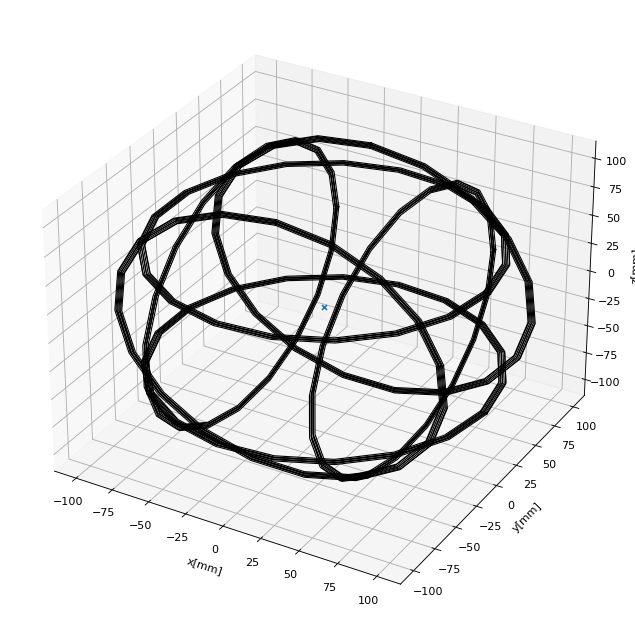

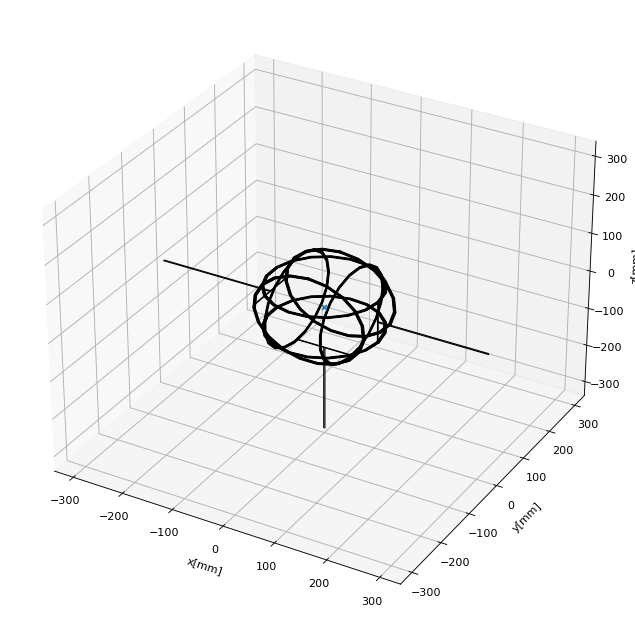

In [66]:
# --------------------------------------------------------------------------
#%% DESIGN OF THE MAIN AXIS HELMHOLTZ COIL ('z') -----------------------------------------------------------------------------------------------
if ZDESIGN:
   
        
    zCoil, zCoilIntDiameter, zCoilExtDiameter, zCoilResistence, zCoilMaxPower, zWirelengthMeters = coilDesign(nIteration = 40,
                                                                                                              initialValue = zInitialValueCoilDiameter,
                                                                                                              desiredField = zDesiredField, 
                                                                                                              I = zCoilCurrent, 
                                                                                                              wireDiameter=AllCoilsWireDiameter, 
                                                                                                              loopsInEachEvenLayer=zLoopsInEachEvenLayer, 
                                                                                                              evenLayers=zEvenLayers, oddLayers=zOddLayers, 
                                                                                                              orientation='z',
                                                                                                              relativeDistance = 1/3,
                                                                                                              maxError = 0.001, #%
                                                                                                              color = zColor,
                                                                                                              wireResistence = wireResistence)
    
    Bcenter = zCoil.getB([0,0,0.000001])   

    print('\nFor "z", getB([0,0,0]) = ',Bcenter ,' mT:')
    print('Internal Distance between coil = ',zCoilIntDiameter/2,' mm')
    print('Coil internal diameter = ',zCoilIntDiameter,' mm')
    print('Coil width = ', (AllCoilsWireDiameter*zLoopsInEachEvenLayer), 'mm') 
    print('min Coil height = ', (zCoilExtDiameter - zCoilIntDiameter), 'mm')  
    print('Coil resistence ~= '+ str(zCoilResistence) +' ohms' )
    print('Coil power dissipation ~= '+ str(zCoilMaxPower) +' W')
    print('Wire length necessary to construct the coil ~= '+ str(zWirelengthMeters) +' m')
    
    
    singleCoilWidth = 0
    
    connectorsCollection =  magpy.Collection()
    connectorsCollection =  constructAccess(I = zCoilCurrent, coilExtDiameter = zCoilExtDiameter, wireDiameter = AllCoilsWireDiameter, 
                           centralPointBetweenHelmCoils = [0,0,0], lengthBetweenCoils = zCoilIntDiameter/2, 
                           singleCoilWidth = singleCoilWidth, helmCoil = connectorsCollection, relativeDistance = relativeDistance)
    
# ------------------------------------------------------------------------------------------------------------------------------------------------
#%% DESIGN OF THE SECOND HELMHOLTZ COIL ('y') -----------------------------------------------------------------------------------------------
if YDESIGN:
        
    yCoil, yCoilIntDiameter, yCoilExtDiameter, yCoilResistence, yCoilMaxPower, yWirelengthMeters = coilDesign(nIteration = 40,
                                                                                                              initialValue = zCoilExtDiameter,
                                                                                                              desiredField = yDesiredField, 
                                                                                                              I = yCoilCurrent, 
                                                                                                              wireDiameter=AllCoilsWireDiameter, 
                                                                                                              loopsInEachEvenLayer=yLoopsInEachEvenLayer, 
                                                                                                              evenLayers=yEvenLayers, oddLayers=yOddLayers, 
                                                                                                              orientation='y',
                                                                                                              relativeDistance = 1/3,
                                                                                                              maxError = 0.001, #%
                                                                                                              color = yColor,
                                                                                                              wireResistence = wireResistence)
    
    Bcenter = yCoil.getB([0,0,0.000001])   

    print('\nFor "y", getB([0,0,0]) = ',Bcenter ,' mT:')
    print('Internal Distance between coil = ',yCoilIntDiameter/2,' mm')
    print('Coil internal diameter = ',yCoilIntDiameter,' mm')
    print('Coil width = ', (AllCoilsWireDiameter*yLoopsInEachEvenLayer), 'mm') 
    print('min Coil height = ', (yCoilExtDiameter - yCoilIntDiameter), 'mm')  
    print('Coil resistence ~= '+ str(yCoilResistence) +' ohms' )
    print('Coil power dissipation ~= '+ str(yCoilMaxPower) +' W')
    print('Wire length necessary to construct the coil ~= '+ str(yWirelengthMeters) +' m')
    
    connectorsCollection.rotate(90,[1,0,0],anchor=[0,0,0])
    connectorsCollection.rotate(180,[0,1,0],anchor=[0,0,0])
            
    connectorsCollection =  constructAccess(I = yCoilCurrent, coilExtDiameter = yCoilExtDiameter, wireDiameter = AllCoilsWireDiameter, 
                           centralPointBetweenHelmCoils = [0,0,0], lengthBetweenCoils = yCoilIntDiameter/2, 
                           singleCoilWidth = singleCoilWidth, helmCoil = connectorsCollection, relativeDistance = relativeDistance)
    
    connectorsCollection.rotate(180,[0,1,0],anchor=[0,0,0])
    connectorsCollection.rotate(-90,[1,0,0],anchor=[0,0,0])
    
# --------------------------------------------------------------------------------------------------
#%% DESIGN OF THE THIRD HELMHOLTZ COIL ('x') -----------------------------------------------------------------------------------------------
if XDESIGN:
    
    xCoil, xCoilIntDiameter, xCoilExtDiameter, xCoilResistence, xCoilMaxPower, xWirelengthMeters = coilDesign(nIteration = 40,
                                                                                                              initialValue = yCoilExtDiameter,
                                                                                                              desiredField = xDesiredField, 
                                                                                                              I = xCoilCurrent, 
                                                                                                              wireDiameter=AllCoilsWireDiameter, 
                                                                                                              loopsInEachEvenLayer=xLoopsInEachEvenLayer, 
                                                                                                              evenLayers=xEvenLayers, oddLayers=xOddLayers, 
                                                                                                              orientation='x',
                                                                                                              relativeDistance = 1/3,
                                                                                                              maxError = 0.001, #%
                                                                                                              color = xColor,
                                                                                                              wireResistence = wireResistence)
    
    Bcenter = xCoil.getB([0,0,0.000001])   

    print('\nFor "x", getB([0,0,0]) = ',Bcenter ,' mT:')
    print('Internal Distance between coil = ',xCoilIntDiameter/2,' mm')
    print('Coil internal diameter = ',xCoilIntDiameter,' mm')
    print('Coil width = ', (AllCoilsWireDiameter*xLoopsInEachEvenLayer), 'mm') 
    print('min Coil height = ', (xCoilExtDiameter - xCoilIntDiameter), 'mm')  
    print('Coil resistence ~= '+ str(xCoilResistence) +' ohms' )
    print('Coil power dissipation ~= '+ str(xCoilMaxPower) +' W')
    print('Wire length necessary to construct the coil ~= '+ str(xWirelengthMeters) +' m')    
        
    connectorsCollection.rotate(-90,[0,1,0],anchor=[0,0,0])
    
    connectorsCollection =  constructAccess(I = xCoilCurrent, coilExtDiameter = xCoilExtDiameter, wireDiameter = AllCoilsWireDiameter, 
                           centralPointBetweenHelmCoils = [0,0,0], lengthBetweenCoils = xCoilIntDiameter/2, 
                           singleCoilWidth = singleCoilWidth, helmCoil = connectorsCollection, relativeDistance = relativeDistance)
    
    connectorsCollection.rotate(90,[0,1,0],anchor=[0,0,0])
            
zyxCoil = magpy.Collection(xCoil,zCoil,yCoil)
zyxCoilandAcess = magpy.Collection(zyxCoil, connectorsCollection)
# ----------------------------------------------------------------------------------------------------------------------------------------------

#%%
    
if ZCOILPLOT:    
    plotBxyz(collectionToPlot = zCoil, plotBounds = [-10,10,-10,10], orientation = 'y',  orderMagnitude = 'uT',
             fieldDif = False, figureSize = [16,8], nPlotPoints = 10, xyz0 = 0.000001, figureTittle = 'Main coil ("+z")\ny = 0', 
             compareToCenter = True)
    if ZCOILSCONNECTORPLOT:
        plotBxyz(collectionToPlot = connectorsCollection, plotBounds = [-10,10,-10,10], orientation = 'y',  orderMagnitude = 'uT',
                 fieldDif = False, figureSize = [16,8], nPlotPoints = 10, xyz0 = 0, figureTittle = 'Connectors field ("+z")\ny = 0', 
                 compareToCenter = True)

        
    magpy.displaySystem(zCoil)
    
if YCOILPLOT:
    plotBxyz(collectionToPlot = yCoil, plotBounds = [-10,10,-10,10], orientation = 'x',  orderMagnitude = 'uT',
             fieldDif = False, figureSize = [16,8], nPlotPoints = 10, xyz0 = 0.000001, figureTittle = 'Second coil ("+y")\nx = 0', 
             compareToCenter = True)
    if YCOILSCONNECTORPLOT:
        plotBxyz(collectionToPlot = connectorsCollection, plotBounds = [-10,10,-10,10], orientation = 'x',  orderMagnitude = 'uT',
                 fieldDif = False, figureSize = [16,8], nPlotPoints = 10, xyz0 = 0, figureTittle = 'Connectors field ("+y")\nx = 0', 
                 compareToCenter = True)

        
    magpy.displaySystem(yCoil)

if XCOILPLOT:
    plotBxyz(collectionToPlot = xCoil, plotBounds = [-10,10,-10,10], orientation = 'z',  orderMagnitude = 'uT',
             fieldDif = False, figureSize = [16,8], nPlotPoints = 10, xyz0 = 0.000001, figureTittle = 'Third coil ("+x")\nz = 0', 
             compareToCenter = True)
    if XCOILSCONNECTORPLOT:
        plotBxyz(collectionToPlot = connectorsCollection, plotBounds = [-10,10,-10,10], orientation = 'z',  orderMagnitude = 'uT',
                 fieldDif = False, figureSize = [16,8], nPlotPoints = 10, xyz0 = 0, figureTittle = 'Connectors field ("+x")\nz = 0', 
                 compareToCenter = True)
        
    magpy.displaySystem(xCoil)
    
if DISPSYS:
    magpy.displaySystem(connectorsCollection)
    magpy.displaySystem(zyxCoil)
    magpy.displaySystem(zyxCoilandAcess)